In [7]:
import torch 
import torchvision
import torchvision.transforms as transforms

In [10]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

In [11]:
trainset = torchvision.datasets.CIFAR10(root='./data',train=True,download=True,transform=transform)

In [12]:
trainloader = torch.utils.data.DataLoader(trainset,batch_size=4,shuffle=True,num_workers = 2)

In [13]:
testset = torchvision.datasets.CIFAR10(root='./data',train=False,download= True,transform=transform)

Files already downloaded and verified


In [14]:
testLoader = torch.utils.data.DataLoader(testset,batch_size=4,shuffle=False,num_workers=2)

In [15]:
classes = ('plane','car','bird','cat','deer','dog','frog','horse','ship','trunk')

In [16]:
import matplotlib.pyplot as plt
import numpy as np

In [17]:
# function to show a image
def imshow(img):
    img = img/2 +0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg,(1,2,0)))
    plt.show()

In [18]:
# get some random training images
dataiter = iter(trainloader)
images,labels = dataiter.next()

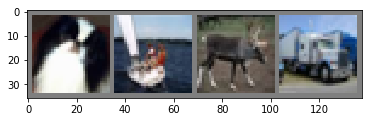

In [24]:
# show images
imshow(torchvision.utils.make_grid(images))

In [28]:
print(' '.join('%5s'%classes[labels[j]] for j in range(4)))

  dog  ship  deer trunk


### Define a Convolutional Neural Network

In [30]:
import torch.nn as nn
import torch.nn.functional as F

In [31]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.conv1 = nn.Conv2d(3,6,5)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 =nn.Conv2d(6,16,5)
        self.fc1 = nn.Linear(16*5*5,120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10)
    
    def forward(self,x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        
        x = x.view(-1,16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
        

In [42]:
net= Net()

In [43]:
net

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [44]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(),lr=0.001,momentum=0.9)

In [45]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [46]:
print(device)

cuda:0


In [48]:
for epoch in range(2):
    
    running_loss = 0.0
    for i,data in enumerate(trainloader,0):
        # get the inputs
        inputs,labels = data
        # zero the parameter gradients
        optimizer.zero_grad()
        
        # forward + backward + optimizer
        outputs = net(inputs)
        loss = criterion(outputs,labels)
        loss.backward()
        optimizer.step()
        
        # print atatistics
        running_loss += loss.item()
        if i%2000 == 1999:
            print('[%d,%5d] loss: %3f' %(epoch+1, i+1,running_loss/2000))
            running_loss = 0.0

print("Finished training")

Exception ignored in: <bound method Image.__del__ of <PIL.Image.Image image mode=RGB size=32x32 at 0x7FA90174AE80>>
Traceback (most recent call last):
  File "/home/kebo/.conda/envs/venv/lib/python3.6/site-packages/PIL/Image.py", line 616, in __del__
    if (hasattr(self, 'fp') and hasattr(self, '_exclusive_fp')
KeyboardInterrupt


KeyboardInterrupt: 

### Test the network on the test data

In [ ]:
dataiter = iter(testloader)
images